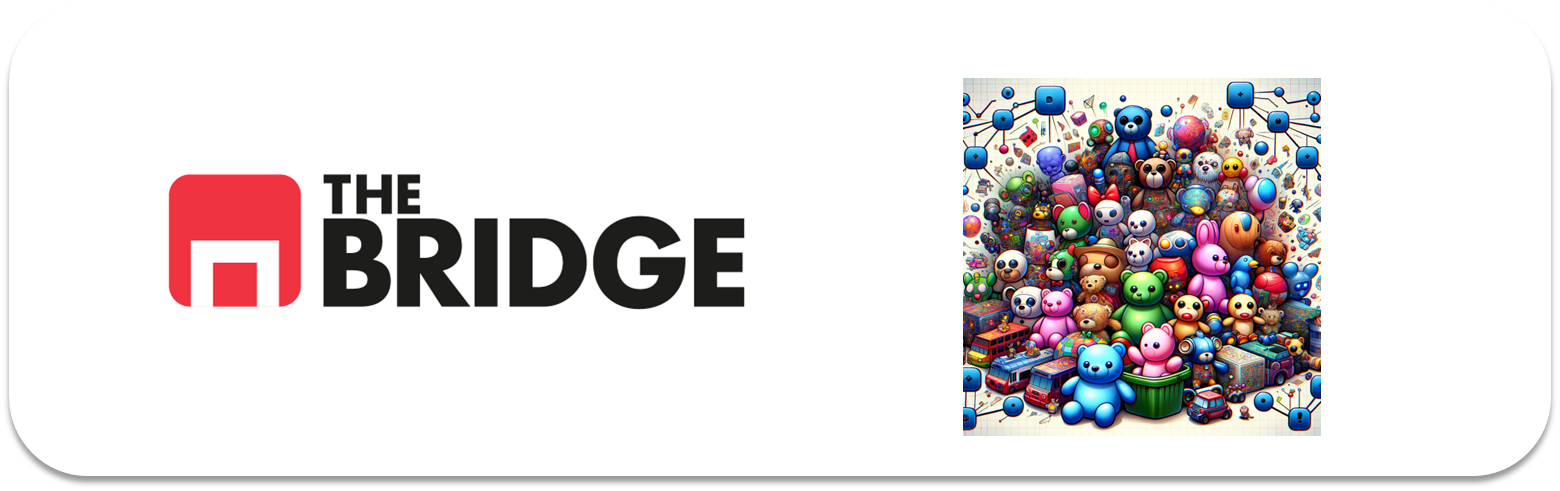

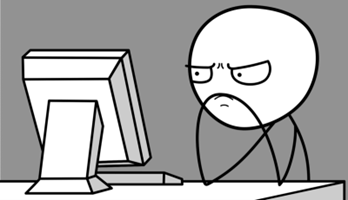

## PRACTICA OBLIGATORIA: K-MEANS

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado sobre imágenes para practicar con el algoritmo k-means. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings(action="ignore")

## **#1**

Vamos a trabajar con un dataset también entre los "clásicos" (aunque a veces menos conocido) que es el de rostros Olivetti. Este dataset contiene 400 imágenes en escala de grises de 64 × 64 píxeles de rostros.   


Como en otros datasets de imágenes, estás están "aplanadas" de forma que cada pixel es una feature y por cada imagen hay $64\times 64 = 4096$ features.  

Se fotografiaron 40 personas diferentes (10 veces cada una) y esas fotografías se recogen en el dataset.  

La tarea habitual es entrenar un modelo que pueda predecir qué persona está representada en cada imagen, pero nosotros lo vamos a hacer de forma no supervisada. 



### #1.1

Carga el conjunto de datos usando la función `sklearn.datasets.fetch_olivetti_faces()`. Recuerda que se carga un "diccionario". Muestra su descripción acudiendo a la clave "DESCR".

In [54]:
faces_data = fetch_olivetti_faces()

print(faces_data['DESCR'])

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

### #1.2 

Aunque no lo vas a usar hasta el final de la práctica, muestra el target. Luego cargalo todo en un mismo dataframe (tendrás que añadir el target) y obtén otro dataset con todas las imagenes reordenadas aleatoriamente (emplea por ejemplo el método `sample` del dataframe o el método que tú quieras)

In [55]:
print("Target:", faces_data.target)

Target: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 

In [56]:
# Crear un DataFrame con las características y el target
X = faces_data.data
y = faces_data.target
df = pd.DataFrame(X)
df['target'] = y

print(df.head())

# Reordenar aleatoriamente las imágenes
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_shuffled.head())

          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669421  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  target  
0  0.1

### #1.3

Vamos a dividir en train y test, pero OJO RECUERDA QUE EN LOS PROBLEMAS NO SUPERVISADOS NO HAY SPLIT (porque no hay target), aquí lo hacemos para poder comparar posteriormente el clustering con la clasificación (ya que es uan práctica formativa).

Por tanto, divídelo en un conjunto de entrenamiento, un conjunto de validación y un conjunto de pruebas (80-10-10). Dado que el conjunto de datos es bastante pequeño, emplea un muestreo estratificado para asegurarse de que haya el mismo número de imágenes por persona en cada conjunto (estratificando por la columna que contenga el target)

NOTA: No hemos hecho hasta ahora la separación en tres sets, investiga por tu cuenta o bien haz primero un split 90-10 y luego otro split 89-11 sobre el de 80 (para que de los números aproximados), por ejemplo.

In [57]:
# # Realizar la primera división 80-20 (entrenamiento + validación y pruebas)
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
# train_val_idx, test_idx = next(sss.split(df_shuffled, df_shuffled['target']))
# train_val_df = df_shuffled.iloc[train_val_idx]
# test_df = df_shuffled.iloc[test_idx]

# # Realizar la segunda división 80-10 sobre el conjunto de entrenamiento + validación
# sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1111, random_state=42)
# train_idx, val_idx = next(sss.split(train_val_df, train_val_df['target']))
# train_df = train_val_df.iloc[train_idx]
# val_df = train_val_df.iloc[val_idx]

# print("Tamaño del conjunto de entrenamiento:", len(train_df))
# print("Tamaño del conjunto de validación:", len(val_df))
# print("Tamaño del conjunto de pruebas:", len(test_df))

In [58]:
# Realizar la primera división 90-10 (entrenamiento + validación y pruebas)
train_val_df, test_df = train_test_split(df_shuffled, test_size=0.1, random_state=42, stratify=df_shuffled['target'])

# Realizar la segunda división 80-10 sobre el conjunto de entrenamiento + validación
train_df, val_df = train_test_split(train_val_df, test_size=0.1111, random_state=42, stratify=train_val_df['target'])

print("Tamaño del conjunto de entrenamiento:", len(train_df))
print("Tamaño del conjunto de validación:", len(val_df))
print("Tamaño del conjunto de pruebas:", len(test_df))

Tamaño del conjunto de entrenamiento: 320
Tamaño del conjunto de validación: 40
Tamaño del conjunto de pruebas: 40


- Primera división (90-10): Divide el DataFrame reordenado df_shuffled en train_val_df (conjunto de entrenamiento + validación) y test_df (conjunto de pruebas), utilizando un muestreo estratificado por el target.
- Segunda división (80-10): Divide train_val_df en train_df (conjunto de entrenamiento) y val_df (conjunto de validación), utilizando nuevamente un muestreo estratificado por el target.

La proporción exacta para la segunda división se calcula como 
0.1/0.9
≈
0.1111
 para obtener un conjunto de validación que sea el 10% del total original

### #1.4

Crea los pares X,y para train, validation y test.

In [59]:
# Separar las características y las etiquetas para el conjunto de entrenamiento
X_train = train_df.drop(columns=['target']).values
y_train = train_df['target'].values

# Separar las características y las etiquetas para el conjunto de validación
X_val = val_df.drop(columns=['target']).values
y_val = val_df['target'].values

# Separar las características y las etiquetas para el conjunto de pruebas
X_test = test_df.drop(columns=['target']).values
y_test = test_df['target'].values

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_val:", X_val.shape)
print("Tamaño de y_val:", y_val.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)


Tamaño de X_train: (320, 4096)
Tamaño de y_train: (320,)
Tamaño de X_val: (40, 4096)
Tamaño de y_val: (40,)
Tamaño de X_test: (40, 4096)
Tamaño de y_test: (40,)


Utiliza la siguiente función para visualizar alguna de las caras (observa que tienes que dar la X y la y, usa iloc en ambos datasets)

In [60]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

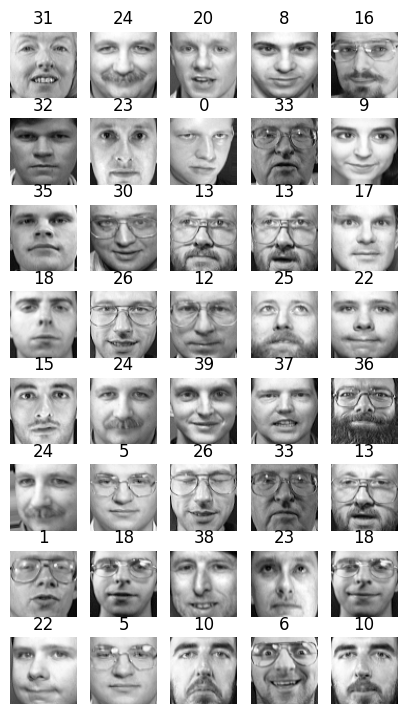

In [77]:
num_faces_to_display = 40
faces_subset = X_train[:num_faces_to_display]
labels_subset = y_train[:num_faces_to_display]

plot_faces(faces_subset, labels_subset)

### #1.5

Para acelerar las cosas, reduciremos la dimensionalidad de los datos utilizando PCA (técnica que veremos en el siguiente sprint). Modifica la siguiente celda de forma que las X se correspondan con las que has utilizado en el ejercicio anterior.

In [62]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

pca.n_components_

221

In [78]:
X_train_pca.shape

(320, 221)

### 1.6

Aquí viene la parte del león. A continuación, agrupa las imágenes utilizando K-Means sobre el dataset de train reducido en el ejercicio anterior. Emplea el método del máximo de score de silueta para obtener el mejor k, probando con K de 5 en 5 hasta 150. ¿Cuál es el k que proporciona el mejor score de silueta? NOTA: Emplea todas las features (no hace falta seleccionar, y ya están escaladas entre 0 y 1)

In [63]:
# Definir el rango de valores de k a probar
k_values = range(5, 200, 5)
best_k = 0
best_score = -1
scores = []

# Probar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=4, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train_pca)
    silhouette_avg = silhouette_score(X_train_pca, cluster_labels)
    scores.append(silhouette_avg)
    print(f"Para k = {k}, el score de silueta es {silhouette_avg}")
    
    if silhouette_avg > best_score:
        best_k = k
        best_score = silhouette_avg

print(f"\nEl mejor k es {best_k} con un score de silueta de {best_score}")



Para k = 5, el score de silueta es 0.10669732093811035
Para k = 10, el score de silueta es 0.09113310277462006
Para k = 15, el score de silueta es 0.09355054795742035
Para k = 20, el score de silueta es 0.11951868236064911
Para k = 25, el score de silueta es 0.13458552956581116
Para k = 30, el score de silueta es 0.1422293335199356
Para k = 35, el score de silueta es 0.1322057694196701
Para k = 40, el score de silueta es 0.14336606860160828
Para k = 45, el score de silueta es 0.16358235478401184
Para k = 50, el score de silueta es 0.17012935876846313
Para k = 55, el score de silueta es 0.18775705993175507
Para k = 60, el score de silueta es 0.1928590089082718
Para k = 65, el score de silueta es 0.17741456627845764
Para k = 70, el score de silueta es 0.1980089545249939
Para k = 75, el score de silueta es 0.18861012160778046
Para k = 80, el score de silueta es 0.19224056601524353
Para k = 85, el score de silueta es 0.19152644276618958
Para k = 90, el score de silueta es 0.194588825106620

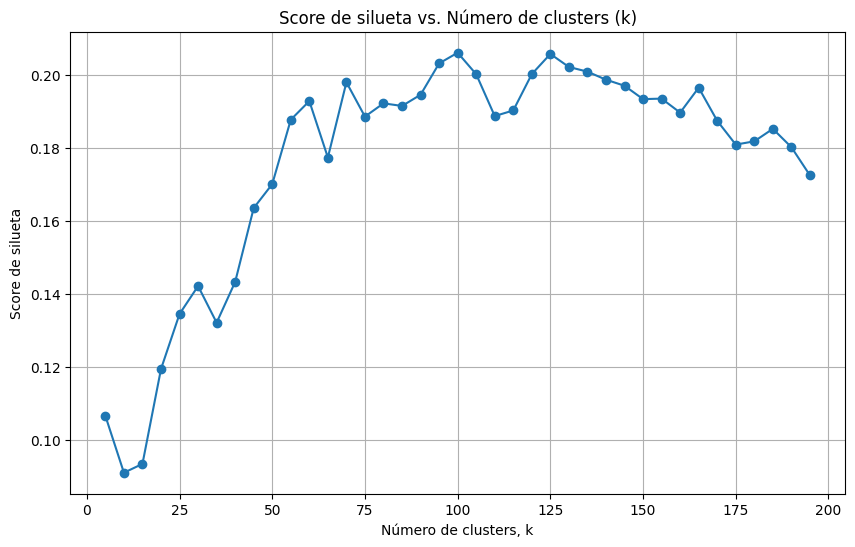

In [64]:
# Graficar el score de silueta para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Score de silueta')
plt.title('Score de silueta vs. Número de clusters (k)')
plt.grid(True)
plt.show()

### #1.7

Repite el ejercio anterior empleando ahora el método del codo de Inercia. ¿Sale algo más concluyente o que refuerce el anterior resultado?

In [65]:
# Definir el rango de valores de k a probar
k_values = range(5, 200, 5)
inertias = []

# Probar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    inertias.append(kmeans.inertia_)
    print(f"Para k = {k}, la inercia es {kmeans.inertia_}")

Para k = 5, la inercia es 17382.04296875
Para k = 10, la inercia es 15251.580078125
Para k = 15, la inercia es 13779.544921875
Para k = 20, la inercia es 12496.544921875
Para k = 25, la inercia es 11710.41015625
Para k = 30, la inercia es 10736.306640625
Para k = 35, la inercia es 10184.29296875
Para k = 40, la inercia es 9437.734375
Para k = 45, la inercia es 8622.15234375
Para k = 50, la inercia es 8082.51513671875
Para k = 55, la inercia es 7634.51806640625
Para k = 60, la inercia es 7192.75341796875
Para k = 65, la inercia es 6825.9072265625
Para k = 70, la inercia es 6470.7900390625
Para k = 75, la inercia es 6172.9482421875
Para k = 80, la inercia es 5881.1357421875
Para k = 85, la inercia es 5527.98046875
Para k = 90, la inercia es 5249.62060546875
Para k = 95, la inercia es 4988.5712890625
Para k = 100, la inercia es 4738.54443359375
Para k = 105, la inercia es 4513.5546875
Para k = 110, la inercia es 4260.25634765625
Para k = 115, la inercia es 4073.12255859375
Para k = 120, l

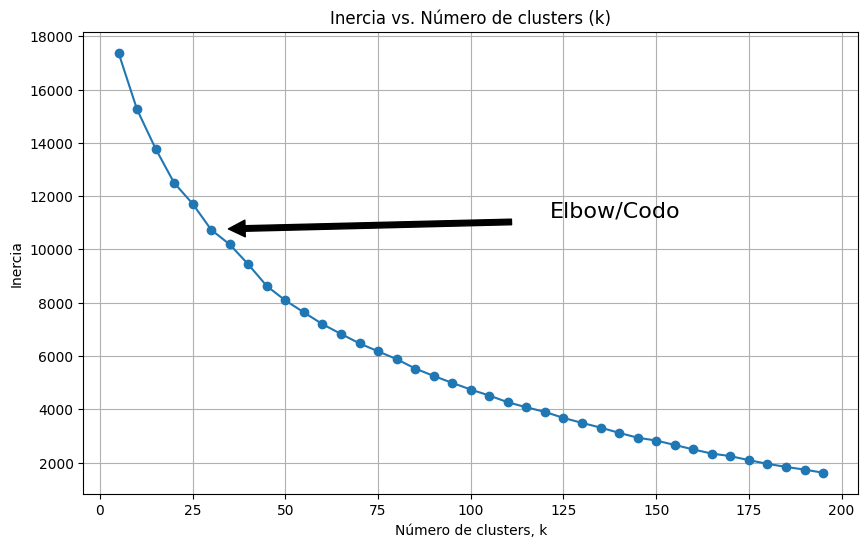

In [66]:
# Graficar la inercia para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.annotate('Elbow/Codo',
             xy=(25, inertias[5]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.title('Inercia vs. Número de clusters (k)')
plt.grid(True)
plt.show()

### #1.8

Quédate con el k obtenido con el método del score de silueta y asigna el modelo con ese k a una variable `best_model`

In [67]:
best_k = 100

best_model = KMeans(n_clusters=best_k, random_state=42)
best_model.fit(X_train_pca)

# Verificar los clusters asignados
cluster_labels = best_model.predict(X_train_pca)
print(f"Clusters asignados con k = {best_k}:", np.unique(cluster_labels))

Clusters asignados con k = 100: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


### #1.9

Haz una valoración del método de clustering para el K elegido. Para ello crea un programa que recorra la lista de etiquetas dadas por "best_model" y que, haciendo uso de la función que ya te hemos proporcionado, pinte las caras asignadas a los 10 primeros clústeres. Ojo tendrás que hacer una pequeña adaptación porque las features de entrenamiento no son las features reales (son una "transformación" de estas) y si pasas el X de entrenamiento no verás nada. ¿Ves caras similares?

Cluster 0: 3 caras


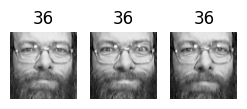

Cluster 1: 3 caras


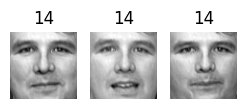

Cluster 2: 3 caras


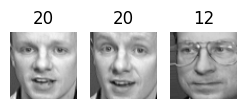

Cluster 3: 3 caras


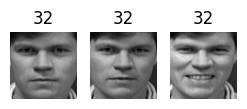

Cluster 4: 7 caras


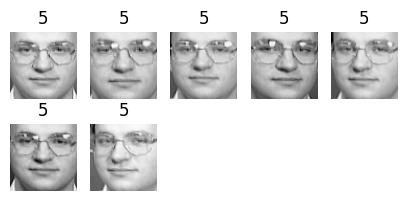

Cluster 5: 3 caras


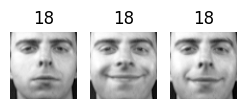

Cluster 6: 3 caras


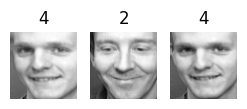

Cluster 7: 1 caras


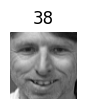

Cluster 8: 6 caras


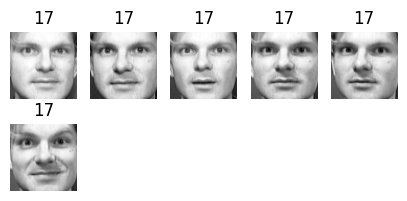

Cluster 9: 2 caras


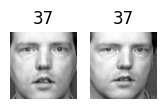

In [68]:
# Obtener las etiquetas de los clusters para los datos de entrenamiento originales
cluster_labels = best_model.predict(X_train_pca)

# Visualizar las caras asignadas a los 10 primeros clusters
for cluster in range(10):
    # Obtener las caras en el cluster actual
    faces_in_cluster = X_train[cluster_labels == cluster]
    labels_in_cluster = y_train[cluster_labels == cluster]
    
    # Mostrar las primeras 15 caras del cluster (si hay suficientes)
    num_faces_to_display = min(len(faces_in_cluster), 15)
    faces_subset = faces_in_cluster[:num_faces_to_display]
    labels_subset = labels_in_cluster[:num_faces_to_display]
    
    print(f"Cluster {cluster}: {num_faces_to_display} caras")
    plot_faces(faces_subset, labels_subset)

## **#2**


### #2.1


Continuando con el conjunto de datos de caras Olivetti, entrena un clasificador para predecir qué persona está representada en cada imagen, y evalúalo en el conjunto de validación. Utiliza un RandomForest con 150 submodelos o estimadores (y el resto de hiperparámetros déjalos a su valor por defecto)

In [69]:
# Crear el modelo RandomForest con 150 estimadores
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de validación
y_val_pred = rf_model.predict(X_val)

# Evaluar el modelo
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print(f"Precisión en el conjunto de validación: {accuracy}")
print("Informe de clasificación:")
print(report)

Precisión en el conjunto de validación: 0.975
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
         

### #2.2

Utiliza K-Means como una herramienta de reducción de dimensionalidad y entrena un clasificador en el conjunto reducido. Para ello emplea el método transform de manera que ahora las features de entrada sean las distancias de cada punto a los centroides del modelo "best_model" de la parte anterior. Por ejemplo:
```python
X_train_reduced = best_model.transform(X_train_pca) 
```


Ojo lo tienes que aplicar a todos los datasets. Luego vuelve a entrenar un RandomForest sobre este dataset y evalualo contra el dataset de validacion.

In [70]:
# Transformar las características de entrada en distancias a los centroides del modelo best_model
X_train_reduced = best_model.transform(X_train_pca)
X_val_reduced = best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

In [71]:
rf_model_reduced = RandomForestClassifier(n_estimators=150, random_state=42)

In [72]:
# Entrenar el modelo con los datos de entrenamiento reducidos
rf_model_reduced.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [73]:
# Predecir las etiquetas en el conjunto de validación reducido
y_val_pred_reduced = rf_model_reduced.predict(X_val_reduced)

In [74]:
# Evaluar el modelo reducido
accuracy_reduced = accuracy_score(y_val, y_val_pred_reduced)
report_reduced = classification_report(y_val, y_val_pred_reduced)

print(f"Precisión en el conjunto de validación (reducido): {accuracy_reduced}")
print("Informe de clasificación (reducido):")
print(report_reduced)

Precisión en el conjunto de validación (reducido): 0.9
Informe de clasificación (reducido):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00

### #2.3 EXTRA VOLUNTARIO

Busca el número de clusters k que generen un algoritmo kmeans que a su vez sus distancias a los centroides sean las features de un clasificador RandomForest y que permita al clasificador obtener el mejor rendimiento: ¿Qué rendimiento puedes alcanzar? (en terminos de Accuracy)

In [75]:
# Definir el rango de valores de k a probar
k_values = range(5, 155, 5)
best_k = 0
best_accuracy = 0

# Almacenar los resultados
results = []

# Probar diferentes valores de k
for k in k_values:
    # Ajustar el modelo K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_pca)
    
    # Transformar las características
    X_train_reduced = kmeans.transform(X_train_pca)
    X_val_reduced = kmeans.transform(X_valid_pca)
    
    # Crear y entrenar el modelo RandomForest
    rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
    rf_model.fit(X_train_reduced, y_train)
    
    # Predecir y evaluar en el conjunto de validación
    y_val_pred = rf_model.predict(X_val_reduced)
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Almacenar el resultado
    results.append((k, accuracy))
    
    # Actualizar el mejor k si es necesario
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

    print(f"Para k = {k}, la precisión es {accuracy}")

print(f"\nEl mejor k es {best_k} con una precisión de {best_accuracy}")

Para k = 5, la precisión es 0.425
Para k = 10, la precisión es 0.6
Para k = 15, la precisión es 0.675
Para k = 20, la precisión es 0.775
Para k = 25, la precisión es 0.725
Para k = 30, la precisión es 0.825
Para k = 35, la precisión es 0.825
Para k = 40, la precisión es 0.85
Para k = 45, la precisión es 0.85
Para k = 50, la precisión es 0.9
Para k = 55, la precisión es 0.85
Para k = 60, la precisión es 0.875
Para k = 65, la precisión es 0.9
Para k = 70, la precisión es 0.8
Para k = 75, la precisión es 0.875
Para k = 80, la precisión es 0.85
Para k = 85, la precisión es 0.825
Para k = 90, la precisión es 0.925
Para k = 95, la precisión es 0.85
Para k = 100, la precisión es 0.9
Para k = 105, la precisión es 0.95
Para k = 110, la precisión es 0.95
Para k = 115, la precisión es 0.925
Para k = 120, la precisión es 0.925
Para k = 125, la precisión es 0.9
Para k = 130, la precisión es 0.9
Para k = 135, la precisión es 0.9
Para k = 140, la precisión es 0.95
Para k = 145, la precisión es 0.9
Pa

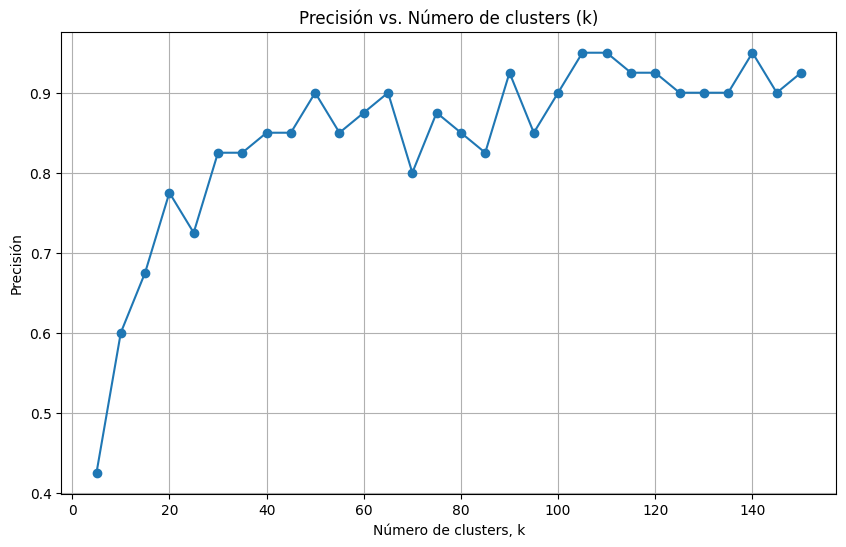

In [76]:
# Graficar la precisión para cada valor de k
k_values, accuracies = zip(*results)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Precisión')
plt.title('Precisión vs. Número de clusters (k)')
plt.grid(True)
plt.show()